<a href="https://colab.research.google.com/github/anton-akulenko/HW02-DS/blob/main/HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
# from scikeras.wrappers import KerasClassifier
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

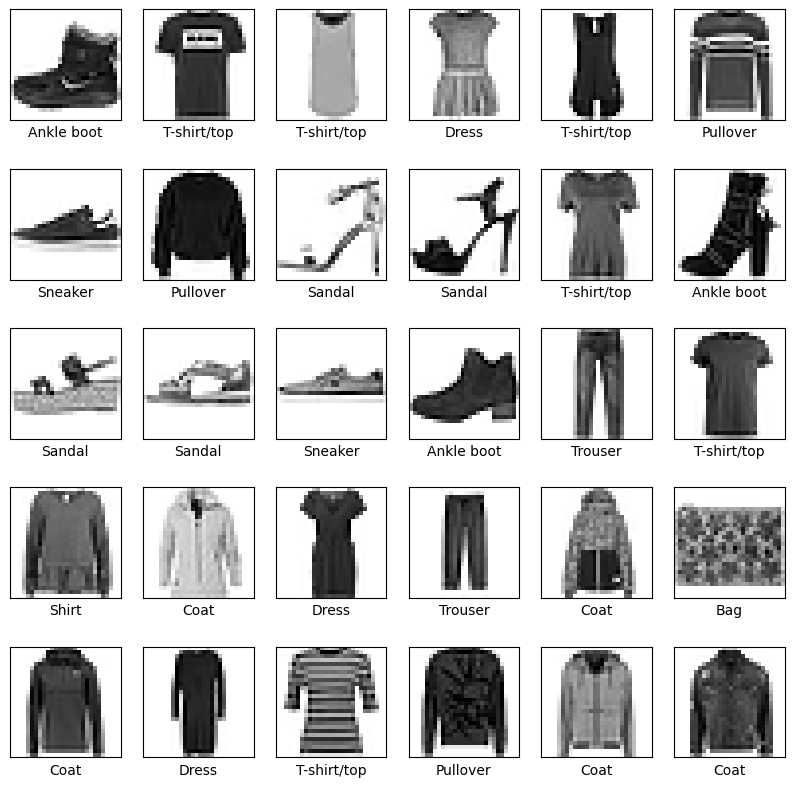

In [4]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [5]:
num_classes = 10
num_features = 28 * 28 * 1
neurons = 512
optimizer = ['Adam']
batch_size = 32
epochs = 30
learning_rate= 0.0005 #[0.0005]
init_mode =  'glorot_normal'#'uniform'
loss='binary_crossentropy', #categorical_crossentropy
activation = 'relu'
weight_constraint = 2.50
dropout_rate = 0.2
metrics = ['accuracy'] #["f1_score"]

In [6]:
x_train = x_train[:10000]
x_test = x_test[:1000]
y_train = y_train[:10000]
y_test = y_test[:1000]

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#for special layers
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

#for Dense only
# x_train = x_train.reshape(-1, num_features)
# x_test = x_test.reshape(-1, num_features)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)



In [8]:
x_train.shape, y_train.shape

((10000, 28, 28, 1), (10000, 10))

In [9]:
model = Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D((2, 2)),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Flatten(),
  Dense(256, activation='relu'),
  Dense(10, activation='softmax')
])

  # batch_size = [128]

  # Best: 0.869800 using {'batch_size': 64, 'epochs': 10,

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [11]:
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=loss, #sparse_categorical_crossentropy
              metrics=[metrics])

In [12]:
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2)

# datagen.fit(x_train, x_test)

# train_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(150, 150),
#     batch_size=20,
#     class_mode="binary"
# )

# validation_generator = test_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(150, 150),
#     batch_size=20,
#     class_mode="binary"
# )

In [13]:
# history = model.fit(
#     datagen.flow(x_train, y_train, batch_size=20, subset='training'),
#     steps_per_epoch=len(x_train) / batch_size,
#     epochs=epochs,
#     validation_data=datagen.flow(x_train, y_train, batch_size=20, subset='validation'),
#     validation_steps=len(x_test) / batch_size
# )

In [14]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/30
313/313 [==============================] - 16s 5ms/step - loss: 0.1659 - accuracy: 0.6756 - val_loss: 0.1241 - val_accuracy: 0.7560
Epoch 2/30
313/313 [==============================] - 2s 6ms/step - loss: 0.0984 - accuracy: 0.7998 - val_loss: 0.0975 - val_accuracy: 0.8010
Epoch 3/30
313/313 [==============================] - 2s 5ms/step - loss: 0.0851 - accuracy: 0.8329 - val_loss: 0.0844 - val_accuracy: 0.8400
Epoch 4/30
313/313 [==============================] - 1s 4ms/step - loss: 0.0776 - accuracy: 0.8475 - val_loss: 0.0797 - val_accuracy: 0.8610
Epoch 5/30
313/313 [==============================] - 1s 4ms/step - loss: 0.0716 - accuracy: 0.8603 - val_loss: 0.0795 - val_accuracy: 0.8410
Epoch 6/30
313/313 [==============================] - 1s 4ms/step - loss: 0.0670 - accuracy: 0.8669 - val_loss: 0.0743 - val_accuracy: 0.8640
Epoch 7/30
313/313 [==============================] - 1s 4ms/step - loss: 0.0638 - accuracy: 0.8754 - val_loss: 0.0707 - val_accuracy: 0.8780
Epoch

In [15]:
# model2 = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

In [16]:
# model.fit(x_train, y_train, epochs=20, batch_size=64, verbose=1)



```
313/313 [==============================] - 11s 36ms/step - loss: 0.0456 - accuracy: 0.9836
<keras.src.callbacks.History at 0x79f862c17ac0>```



In [17]:
result = model.evaluate(x_test, y_test)
print(result)

32/32 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.8890
[0.07625353336334229, 0.8889999985694885]


In [18]:
# result = model2.evaluate(x_test, y_test)
# print(model2.history['accuracy'][-1])

In [19]:
from sklearn.metrics import classification_report

predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

report = classification_report(np.argmax(y_test, axis=1), predicted_labels, target_names=class_names)
print(report)

32/32 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.79      0.84       107
     Trouser       1.00      0.98      0.99       105
    Pullover       0.87      0.80      0.84       111
       Dress       0.90      0.86      0.88        93
        Coat       0.80      0.87      0.83       115
      Sandal       0.97      0.98      0.97        87
       Shirt       0.65      0.76      0.70        97
     Sneaker       0.95      0.97      0.96        95
         Bag       0.96      0.98      0.97        95
  Ankle boot       0.97      0.94      0.95        95

    accuracy                           0.89      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



In [20]:
# history.history

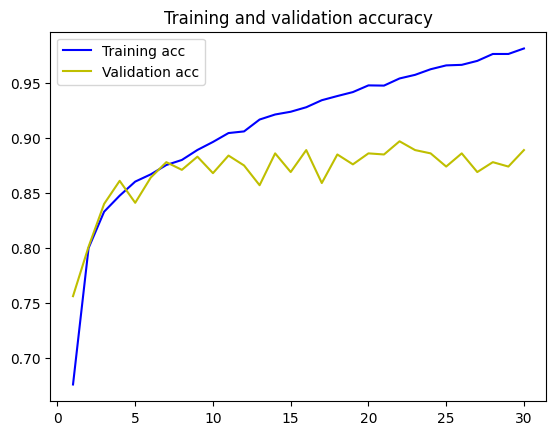

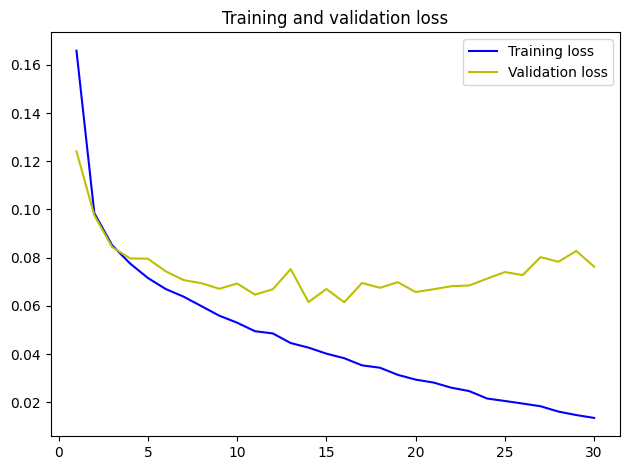

In [21]:
import matplotlib.pyplot as plt


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label="Training acc")
plt.plot(epochs, val_acc, "y", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "y", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.tight_layout()
plt.show()

# Part 2

In [22]:
import tensorflow as tf

from keras.applications.vgg16 import VGG16
# from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers



In [23]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [24]:
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [25]:
x_train_vgg = np.repeat(x_train, 3, axis=3)
x_train_vgg = tf.image.resize(x_train_vgg, [32, 32])
x_test_vgg = np.repeat(x_test, 3, axis=3)
x_test_vgg = tf.image.resize(x_test_vgg, [32, 32])

In [26]:
x_train_vgg.shape

TensorShape([60000, 32, 32, 3])

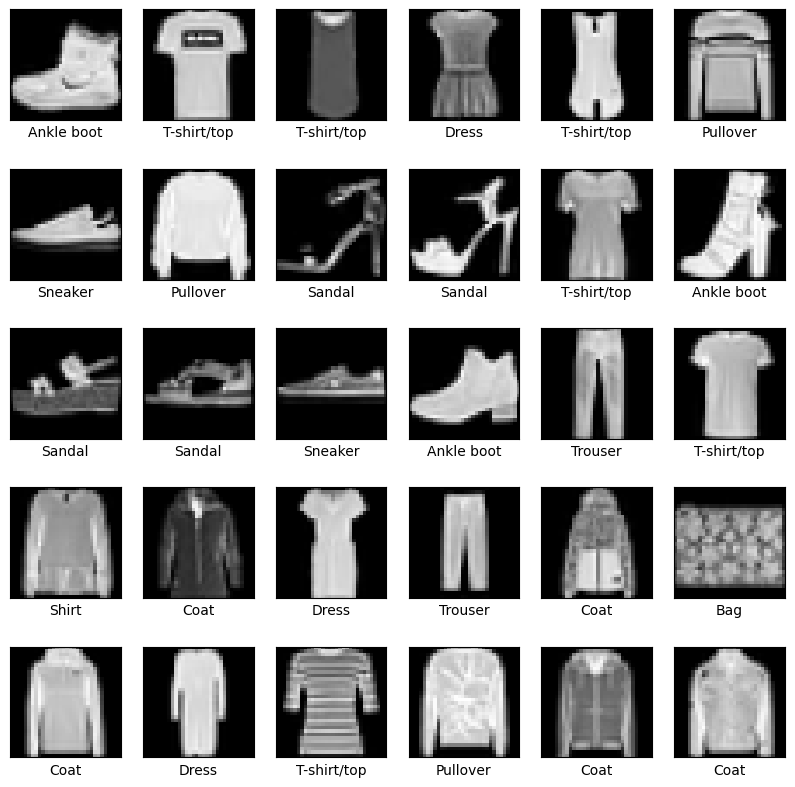

In [27]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_vgg[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [28]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

model = Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(512, activation="relu"),
   layers.Dropout(0.5),
   layers.Dense(10, activation="softmax"),
])

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=["acc"]
)

58889256/58889256 [==============================] - 0s 0us/step


In [29]:
batch_size = 32
epochs = 30

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14982474 (57.15 MB)
Trainable params: 267786 (1.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [31]:
history = model.fit(x_train_vgg, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_vgg, y_test))

Epoch 1/30
1875/1875 [==============================] - 22s 10ms/step - loss: 0.1168 - acc: 0.7717 - val_loss: 0.0848 - val_acc: 0.8291
Epoch 2/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0839 - acc: 0.8321 - val_loss: 0.0767 - val_acc: 0.8460
Epoch 3/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0766 - acc: 0.8458 - val_loss: 0.0721 - val_acc: 0.8514
Epoch 4/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0719 - acc: 0.8554 - val_loss: 0.0695 - val_acc: 0.8550
Epoch 5/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0698 - acc: 0.8587 - val_loss: 0.0683 - val_acc: 0.8584
Epoch 6/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0674 - acc: 0.8643 - val_loss: 0.0680 - val_acc: 0.8614
Epoch 7/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0653 - acc: 0.8681 - val_loss: 0.0662 - val_acc: 0.8667
Epoch 8/30
1875/1875 [==============================] 

In [32]:
result = model.evaluate(x_test_vgg, y_test)
print(result)

313/313 [==============================] - 3s 8ms/step - loss: 0.0605 - acc: 0.8807
[0.060496967285871506, 0.8806999921798706]


In [33]:
from sklearn.metrics import classification_report

predicted_probabilities = model.predict(x_test_vgg)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

report = classification_report(np.argmax(y_test, axis=1), predicted_labels, target_names=class_names)
print(report)

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.88      0.84      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.84      0.79      0.81      1000
       Dress       0.88      0.84      0.86      1000
        Coat       0.76      0.83      0.79      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.71      0.64      0.67      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
history.history

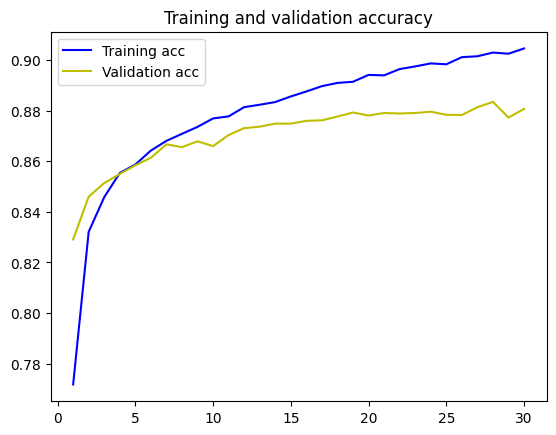

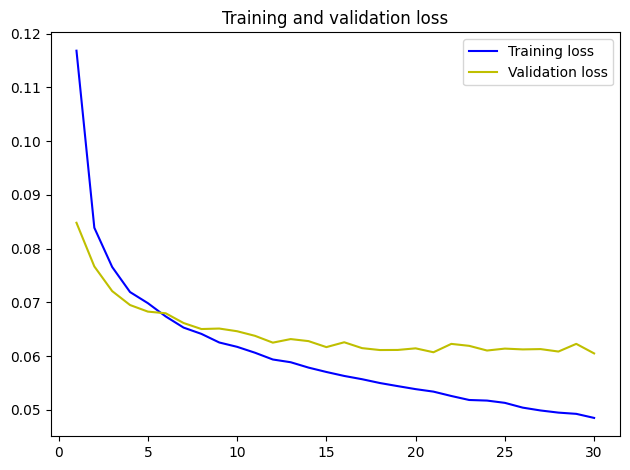

In [35]:
import matplotlib.pyplot as plt


acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "b", label="Training acc")
plt.plot(epochs, val_acc, "y", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "y", label="Validation loss")
plt.title("Training and validation loss")


plt.legend()
plt.tight_layout()
plt.show()

In [36]:
base_model_defroze = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
base_model_defroze.trainable = True
# Розморожуємо декілька верхніх шарів
for layer in base_model_defroze.layers[:-5]:
    layer.trainable = False

In [37]:
model2 = Sequential([
   base_model_defroze,
   layers.Flatten(),
   layers.Dense(512, activation="relu"),
   layers.Dropout(0.5),
   layers.Dense(10, activation="softmax"),
])

model2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=["acc"]
)


In [38]:
base_model_defroze.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [39]:
history2 = model2.fit(x_train_vgg, y_train,
          batch_size=batch_size,
          epochs=30,
          verbose=1,
          validation_data=(x_test_vgg, y_test))

Epoch 1/30
1875/1875 [==============================] - 32s 16ms/step - loss: 0.0787 - acc: 0.8464 - val_loss: 0.0683 - val_acc: 0.8798
Epoch 2/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0568 - acc: 0.8903 - val_loss: 0.0623 - val_acc: 0.8820
Epoch 3/30
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0505 - acc: 0.9014 - val_loss: 0.0520 - val_acc: 0.9006
Epoch 4/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0470 - acc: 0.9063 - val_loss: 0.0519 - val_acc: 0.9004
Epoch 5/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0442 - acc: 0.9136 - val_loss: 0.0522 - val_acc: 0.8980
Epoch 6/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0417 - acc: 0.9183 - val_loss: 0.0539 - val_acc: 0.8980
Epoch 7/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0398 - acc: 0.9221 - val_loss: 0.0550 - val_acc: 0.9055
Epoch 8/30
1875/1875 [==========================

In [40]:
result2 = model2.evaluate(x_test_vgg, y_test)
print(result2)

313/313 [==============================] - 3s 8ms/step - loss: 0.0834 - acc: 0.9066
[0.0833667740225792, 0.9065999984741211]


In [41]:
from sklearn.metrics import classification_report

predicted_probabilities2 = model2.predict(x_test_vgg)
predicted_labels2 = np.argmax(predicted_probabilities, axis=1)

report2 = classification_report(np.argmax(y_test, axis=1), predicted_labels2, target_names=class_names)
print(report2)

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.88      0.84      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.84      0.79      0.81      1000
       Dress       0.88      0.84      0.86      1000
        Coat       0.76      0.83      0.79      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.71      0.64      0.67      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



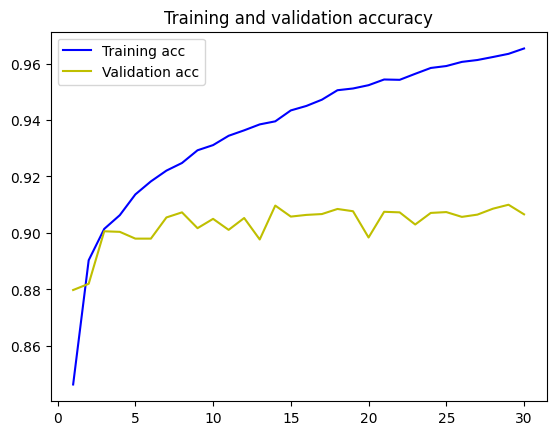

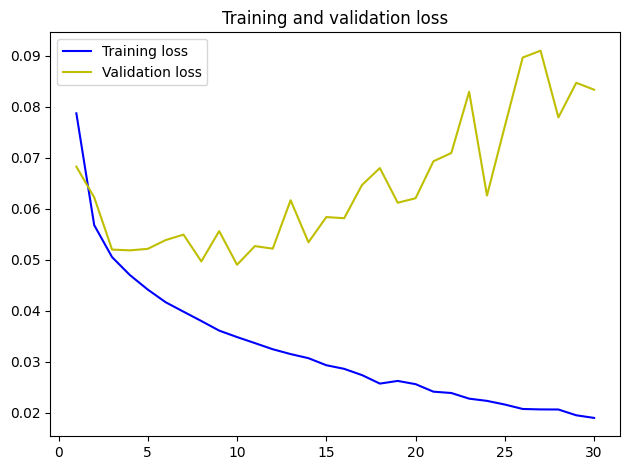

In [42]:
import matplotlib.pyplot as plt


acc2 = history2.history["acc"]
val_acc2 = history2.history["val_acc"]

loss2 = history2.history["loss"]
val_loss2 = history2.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc2, "b", label="Training acc")
plt.plot(epochs, val_acc2, "y", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss2, "b", label="Training loss")
plt.plot(epochs, val_loss2, "y", label="Validation loss")
plt.title("Training and validation loss")


plt.legend()
plt.tight_layout()
plt.show()

# Conclusion

NN from homework 9:

Train accuracy: 0.9644<br>
Test accuracy: 0.8995


---



**CNN:**

Train accuracy: 0.9815<br>
Test accuracy: 0.8890


---


**VGG16 NON trainable CNN**

Train accuracy: 0.9046<br>
Test accuracy: 0.8807

---



**VGG16 trainable (5 top layers)**

Train accuracy: 0.9653<br>
Test accuracy: 0.9066
